# Patterns and Constructions

In [1]:
from nltk.chunk.regexp import tag_pattern2re_pattern
from nltk.chunk import RegexpParser
from nltk.corpus import brown
import nltk
tag_pattern2re_pattern('<DT>?<NN.*>+')

'(<(DT)>)?(<(NN[^\\{\\}<>]*)>)+'

In [2]:
chunker = RegexpParser('''
NP:
    {<DT><NN.*><.*>*<NN.*>}
    }<VB.*>{
''')

#sent = brown.tagged_sents()[10]
#chunker.parse(sent)

sent = 'The article looks like a work written by a foreigner.'
sent = nltk.pos_tag(nltk.word_tokenize(sent))
sent_ct = chunker.parse(sent)
print(sent_ct)


(S
  (NP The/DT article/NN)
  looks/VBZ
  (NP like/IN a/DT work/NN)
  written/VBN
  (NP by/IN a/DT foreigner/NN)
  ./.)


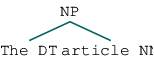

In [3]:
sent_ct.productions()
#sent_ct.chomsky_normal_form()
sent_ct
sent_ct[0]

In [4]:
print(type(sent_ct[0].label))
print(sent_ct[0])
print(type(sent_ct[0].leaves))
print(type(sent_ct[1]))
type(sent_ct[2])

<class 'method'>
(NP The/DT article/NN)
<class 'method'>
<class 'tuple'>


nltk.tree.Tree

In [5]:
i=0
for subtree in sent_ct.subtrees():
    i=i+1
    print(str(i))
    print('label: {}'.format(subtree.label()))
    print(subtree)

1
label: S
(S
  (NP The/DT article/NN)
  looks/VBZ
  (NP like/IN a/DT work/NN)
  written/VBN
  (NP by/IN a/DT foreigner/NN)
  ./.)
2
label: NP
(NP The/DT article/NN)
3
label: NP
(NP like/IN a/DT work/NN)
4
label: NP
(NP by/IN a/DT foreigner/NN)


In [6]:
str(sent_ct)

'(S\n  (NP The/DT article/NN)\n  looks/VBZ\n  (NP like/IN a/DT work/NN)\n  written/VBN\n  (NP by/IN a/DT foreigner/NN)\n  ./.)'

In [7]:
for subtree in sent_ct.subtrees(filter=lambda t: t.label().endswith("NP")):
    print(subtree)

(NP The/DT article/NN)
(NP like/IN a/DT work/NN)
(NP by/IN a/DT foreigner/NN)


In [8]:
# write chunk rules
pat_chunker = RegexpParser('''
ADJ_AND_ADJ:
    {<JJ.*><CC><JJ.*>}
''')

for sent in brown.tagged_sents()[:500]:
    cur_t = pat_chunker.parse(sent)
    cur_pat = [pat for pat in cur_t.subtrees(filter=lambda t: t.label().startswith("ADJ_AND"))]
    if len(cur_pat)>0:
        print(cur_pat)
    

[Tree('ADJ_AND_ADJ', [('outmoded', 'JJ'), ('or', 'CC'), ('inadequate', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('fair', 'JJ'), ('and', 'CC'), ('equitable', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('rural', 'JJ'), ('and', 'CC'), ('urban', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('junior', 'JJ'), ('or', 'CC'), ('senior', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('ambitious', 'JJ'), ('and', 'CC'), ('costly', 'JJ')]), Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('tentative', 'JJ'), ('and', 'CC'), ('exploratory', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('military', 'JJ'), ('and', 'CC'), ('economic', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('firmer', 'JJR'), ('and', 'CC'), ('tougher', 'JJR')])]
[Tree('ADJ_AND_ADJ', [('amateurish', 'JJ'), ('and', 'CC'), ('monumental', 'J

In [9]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Patterns from Raw-Text Corpus

In [10]:
import nltk
from nltk.corpus import gutenberg



In [11]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [12]:
alice_sents = [ ' '.join(sent) 
               for sent in gutenberg.sents(fileids='carroll-alice.txt')
              if len(sent)>=5]


In [13]:
alice_sents[:5]

["[ Alice ' s Adventures in Wonderland by Lewis Carroll 1865 ]",
 'Down the Rabbit - Hole',
 "Alice was beginning to get very tired of sitting by her sister on the bank , and of having nothing to do : once or twice she had peeped into the book her sister was reading , but it had no pictures or conversations in it , ' and what is the use of a book ,' thought Alice ' without pictures or conversation ?'",
 'So she was considering in her own mind ( as well as she could , for the hot day made her feel very sleepy and stupid ), whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies , when suddenly a White Rabbit with pink eyes ran close by her .',
 "There was nothing so VERY remarkable in that ; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself , ' Oh dear !"]

In [14]:
import re

all_matches= [re.findall(r'(?:have|has)(?: [^s]+){0,2}[^\s]+(?:en|ed)', sent) for sent in alice_sents]


In [15]:
print([m for m in all_matches if len(m)!=0])


[['have wondered'], ['have been changed'], ['have been changed'], ['have dropped'], ['have changed'], ['have happened'], ['have liked'], ['have been changed'], ['have answered'], ['have got altered'], ['have called'], ['have to beat time when'], ["have done that , you know ,' Alice gently remarked ; ' they ' d have been"], ['have been'], ['have croqueted the Queen'], ['have everybody executed'], ['have any pepper in my kitchen'], ['have the experiment tried'], ['have been', 'have appeared'], ['have ordered'], ['have wanted'], ['have been'], ['have lived'], ['have no notion how delightful it will be When'], ['have baked'], ['have it explained'], ['have finished'], ['have you executed'], ['have you executed'], ['have you executed'], ['have been'], ['have imitated']]


- The grouping parenthsis changes the behavior of `re.findall()`
- With parenthesis, the regex engine automatically captures the matches in all the groups and return the results as a tuple.
- Use `(?:...)` to create non-capturing gorups

In [16]:
match = re.findall(r'(?:is|was) (?:\w+ing)', '''
Alice was beginning to get very tired of sitting by her sister on the bank , 
and of having nothing to do : once or twice she had peeped into the book 
her sister was reading , but it had no pictures or conversations in it , 
and what is the use of a book , thought Alice  without pictures or conversation ?
''')


if match:
    for m in match:
        print(m.strip())

was beginning
was reading


:::{important}
It seems that when we use `re.findall()`, the matches returned would only be the capturing groups; but when we use `re.finditer()`, it would return the whole match strings as well as every section of the capturing groups.

I would prefer `re.finditer()`. Otherwise, `re.findall()` may need to specify the non-capturing group `(?:...)`.
:::

In [17]:
pat_perfect = re.compile(r'(is|was) (\w+ing)')
text = '''
Alice was beginning to get very tired of sitting by her sister on the bank , 
and of having nothing to do : once or twice she had peeped into the book 
her sister was reading , but it had no pictures or conversations in it , 
and what is the use of a book , thought Alice  without pictures or conversation ?
'''

pat_perfect_matches = pat_perfect.finditer(text)

if pat_perfect_matches:
    for m in pat_perfect_matches:
        print(m.group())

was beginning
was reading
